In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/My Drive/Recommendation System Project/R.mat

In [2]:
import pandas as pd

In [3]:
track_metadata_df = pd.read_csv('/content/drive/My Drive/Recommendation System Project/song_data.csv')
count_play_df = pd.read_csv('/content/drive/My Drive/Recommendation System Project/10000.txt', sep='\t', header=None, names=['user','song','play_count'])

print('First see of track metadata:')
print('Number of rows:', track_metadata_df.shape[0])
print('Number of unique songs:', len(track_metadata_df.song_id.unique()))
display(track_metadata_df.head())
print('Note the problem with repeated track metadata. Let\'s see of counts play song by users:')
display(count_play_df.shape, count_play_df.head())

First see of track metadata:
Number of rows: 1000000
Number of unique songs: 999056


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


Note the problem with repeated track metadata. Let's see of counts play song by users:


(2000000, 3)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
print(count_play_df)

                                             user  ... play_count
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...          1
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...          2
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...          1
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...          1
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...          1
...                                           ...  ...        ...
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...          2
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...          4
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...          3
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...          1
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...          1

[2000000 rows x 3 columns]


In [5]:
user=count_play_df["user"][:100000]
song=count_play_df["song"][:100000]
count=count_play_df["play_count"][:100000]
print(user.shape)
print(song.shape)
print(count.shape)

(100000,)
(100000,)
(100000,)


In [ ]:
#pd.DataFrame(user.unique()).to_csv("/content/drive/My Drive/Recommendation System Project/user.csv")

In [ ]:
#pd.DataFrame(song.unique()).to_csv("/content/drive/My Drive/Recommendation System Project/song.csv")

In [ ]:
#S,T,O,A,D = track_metadata_df["song_id"],track_metadata_df["title"],track_metadata_df["release"],track_metadata_df["artist_name"],track_metadata_df["year"]

In [6]:
user_to_id={u:i for i,u in enumerate(user.unique())}
song_to_id={s:i for i,s in enumerate(song.unique())}
id_to_user={i:u for i,u in enumerate(user.unique())}
id_to_song={i:s for i,s in enumerate(song.unique())}
print(len(user_to_id))
print(len(song_to_id))
print(len(id_to_user))
print(len(id_to_song))

3863
9938
3863
9938


In [7]:
print(id_to_user[50],user_to_id[id_to_user[50]])

6f62f1c30b0f4b87db28c101ddcab89b4f5d7298 50


In [ ]:
# s_to_i = {s:i for i,s in enumerate(S)}
# print(len(s_to_i))

In [ ]:
# arr=[["index","id","title","release","Artist_name","year"]]
# for si in song.unique():
#   index=s_to_i[si]
#   arr.append([song_to_id[si],S[index],T[index],O[index],A[index],D[index]])
# arr=np.array(arr)
# print(arr.shape)

In [ ]:
#pd.DataFrame(arr).to_csv("/content/drive/My Drive/Recommendation System Project/meta.csv")

In [8]:
print(user.shape)

(100000,)


In [9]:
import numpy as np
Y=np.zeros((len(user_to_id),len(song_to_id)))
R=np.zeros((len(user_to_id),len(song_to_id)))
print(Y.shape)
print(R.shape)

(3863, 9938)
(3863, 9938)


In [10]:
counter=0
for u,s,c in zip(user,song,count):
  Y[user_to_id[u],song_to_id[s]]=c
  R[user_to_id[u],song_to_id[s]]=1
  counter+=1
print(counter)

100000


In [11]:
print(Y.shape)
print(R.shape)
print(np.sum(Y))

(3863, 9938)
(3863, 9938)
300974.0


In [ ]:
# my=np.zeros((1,Y.shape[1]))
# r=np.zeros((1,Y.shape[1]))
# p=[1,98,7,12,54,64,66,69,183,226,355]
# q=[4,2,3,5,4,5,3,5,4,5,5]
# for a,b in zip(p,q):
#   my[0][a-1]=b
#   r[0][a-1]=1
# Y=np.concatenate((Y,my),axis=0)
# R=np.concatenate((R,r),axis=0)
# print(Y.shape)
# print(R.shape)

In [12]:
print(Y)
print(R)

[[ 1.  2.  1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0. 23. 20.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
# normalize
mean=np.sum(Y*R,axis=0)/np.sum(R,axis=0)
#sd=(Y*R).std(axis=0,keepdims=True)
Y=(Y-mean)*R

In [ ]:
# params=np.concatenate((np.reshape(mean,(1,len(mean))),sd),axis=0)
# pd.DataFrame(params.T).to_csv("/content/drive/My Drive/Recommendation System Project/mean_std.csv")

In [14]:
n=5 # number of features

In [15]:
user=np.random.randn(n,Y.shape[0])
song=np.random.randn(n,Y.shape[1])
print(user.shape)
print(song.shape)

(5, 3863)
(5, 9938)


In [16]:
err=[]
lr=0.001
lam=7
for k in range(100):
  Rating=user.T @ song
  A=(Rating-Y)*R
  J=np.sum(A**2) + lam*np.sum(user**2) + lam*np.sum(song**2)
  err.append(J)
  user = user - lr*( (A @ song.T).T + lam*user )
  song = song - lr*( user @ A + lam*song )
  print(k,end="-->")

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->

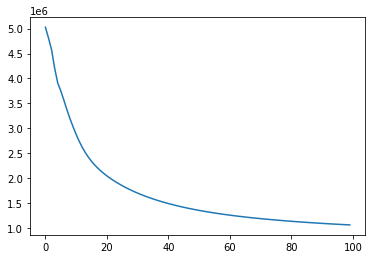

In [17]:
import matplotlib.pyplot as plt
plt.plot(err)

In [18]:
Rating = user.T @ song + mean

In [ ]:
#np.savetxt("/content/drive/My Drive/Recommendation System Project/user_feature.csv", user.T, delimiter=",")

In [ ]:
#np.savetxt("/content/drive/My Drive/Recommendation System Project/song_feature.csv", song.T, delimiter=",")

In [ ]:
#np.savetxt("/content/drive/My Drive/Recommendation System Project/pred_count.csv", Rating, delimiter=",")

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(song.T)
print(tsne_results.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9938 samples in 0.012s...
[t-SNE] Computed neighbors for 9938 samples in 0.807s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9938
[t-SNE] Computed conditional probabilities for sample 2000 / 9938
[t-SNE] Computed conditional probabilities for sample 3000 / 9938
[t-SNE] Computed conditional probabilities for sample 4000 / 9938
[t-SNE] Computed conditional probabilities for sample 5000 / 9938
[t-SNE] Computed conditional probabilities for sample 6000 / 9938
[t-SNE] Computed conditional probabilities for sample 7000 / 9938
[t-SNE] Computed conditional probabilities for sample 8000 / 9938
[t-SNE] Computed conditional probabilities for sample 9000 / 9938
[t-SNE] Computed conditional probabilities for sample 9938 / 9938
[t-SNE] Mean sigma: 0.220755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.308121
[t-SNE] KL divergence after 300 iterations: 3.460173
(9938, 2)


# Clustering Algorithms

In [20]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  # write your code here
  def random_points(data,K):
    return np.random.choice(len(data),K)
  init=random_points(data,K)
  center=[]
  for i in init:
    center.append(data[i])
  center=np.array(center)
  #print(center)

  def calc_group(x,center):
    err=0
    group=[[] for _ in range(len(center))]
    for xi in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(xi-c))
      index=dist.index(min(dist))
      err+=min(dist)
      group[index].append(xi)
    return group,err/len(x)

  def label(x,center):
    label=[]
    for a in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(a-c))
      label.append(dist.index(min(dist)))
    return np.array(label)

  def calc_center(group):
    center=[]
    for g in group:
      center.append(np.mean(np.array(g),axis=0))
    return np.array(center)
  err=[]
  for n in range(itr):
    # assignment stage
    # write your code here
    group,error=calc_group(data,center)
    err.append(error)
    # re-estimation stage
    # write your code here
    center=calc_center(group) 
    #print(Cents)
    if n>2:
        if abs(err[n]-err[n-1])<eps:
          break

    print(n,end = '-->')
   
  return group, center,err,label(data,center)


# Plot

In [21]:
_,_,_,labels=K_means_clustering(song.T,5,25,0)

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->

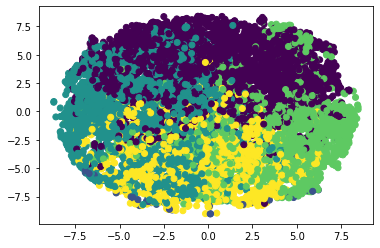

In [22]:
plt.scatter(tsne_results[:,0], tsne_results[:,1],c=labels)
plt.show()

# 3D visualization

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(song.T)
print(tsne_results.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9938 samples in 0.013s...
[t-SNE] Computed neighbors for 9938 samples in 0.788s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9938
[t-SNE] Computed conditional probabilities for sample 2000 / 9938
[t-SNE] Computed conditional probabilities for sample 3000 / 9938
[t-SNE] Computed conditional probabilities for sample 4000 / 9938
[t-SNE] Computed conditional probabilities for sample 5000 / 9938
[t-SNE] Computed conditional probabilities for sample 6000 / 9938
[t-SNE] Computed conditional probabilities for sample 7000 / 9938
[t-SNE] Computed conditional probabilities for sample 8000 / 9938
[t-SNE] Computed conditional probabilities for sample 9000 / 9938
[t-SNE] Computed conditional probabilities for sample 9938 / 9938
[t-SNE] Mean sigma: 0.220755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.936668
[t-SNE] KL divergence after 300 iterations: 2.994048
(9938, 3)


In [24]:
_,_,_,labels=K_means_clustering(song.T,5,25,0)

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->

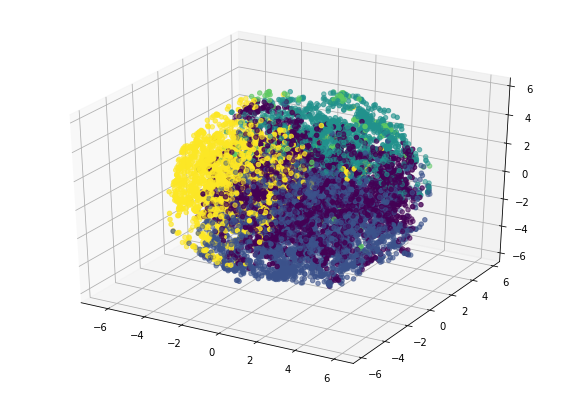

In [25]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter(tsne_results[:,0], tsne_results[:,1],tsne_results[:,2],c=labels)

# 3D visualization of user vectors

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(user.T)
print(tsne_results.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3863 samples in 0.003s...
[t-SNE] Computed neighbors for 3863 samples in 0.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3863
[t-SNE] Computed conditional probabilities for sample 2000 / 3863
[t-SNE] Computed conditional probabilities for sample 3000 / 3863
[t-SNE] Computed conditional probabilities for sample 3863 / 3863
[t-SNE] Mean sigma: 0.311432
[t-SNE] KL divergence after 50 iterations with early exaggeration: 82.289062
[t-SNE] KL divergence after 300 iterations: 1.717656
(3863, 3)


In [54]:
_,_,_,labels=K_means_clustering(user.T,3,25,0)

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->

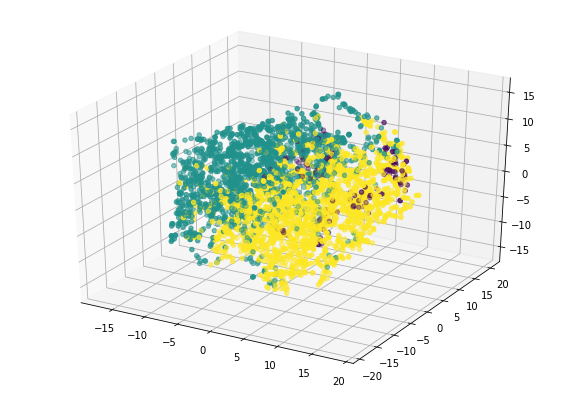

In [55]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter(tsne_results[:,0], tsne_results[:,1],tsne_results[:,2],c=labels)

In [ ]:
############################ END #######################################

In [ ]:
min_error=2**31
save=(0,0,0)

In [ ]:
def train(user,song,lr,lam,itr,min_error,save):
  err=[]
  for _ in range(itr):
    Rating=user.T @ song
    A=(Rating-Y)*R
    J=np.sum(A**2) + lam*np.sum(user**2) + lam*np.sum(song**2)
    err.append(J)
    user = user - lr*( (A @ song.T).T + lam*user )
    song = song - lr*( user @ A + lam*song )

  Rating = user.T @ song + mean
  L=np.array([813,1466,1598,1499,1652,1535,1188,1121,1200,1292])
  error = np.linalg.norm(Rating[-1,L]-np.ones(L.shape)*5)
  if error<min_error:
    min_error=error
    save=(Rating[-1,L],lr,lam)
  return error,min_error,save

In [ ]:
LR=[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
lamb=[0,0.5,1,2,5,7,10,15,20]
arr=np.zeros((len(LR),len(lamb)))
for i in range(len(LR)):
  for j in range(len(lamb)):
    arr[i,j],min_error,save=train(user,song,LR[i],lamb[j],100,min_error,save)
import pandas
pandas.DataFrame(arr,LR,lamb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in matmul
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: inv

,0.0,0.5,1.0,2.0,5.0,7.0,10.0,15.0,20.0
0.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0100,NaN,NaN,NaN,NaN,0.001896,0.000171,0.000005,1.068782e-08,1.786116e-11
0.0050,1.580068,1.061508,0.715515,0.329158,0.036603,0.009413,0.001347,5.829402e-05,2.596918e-06
0.0010,1.123662,1.023851,0.932961,0.774807,0.444406,0.307098,0.176594,7.027461e-02,2.790311e-02
0.0005,1.035649,0.986757,0.940158,0.853418,0.638069,0.525423,0.392376,2.407389e-01,1.473160e-01
0.0001,0.968641,0.959066,0.949585,0.930902,0.877013,0.842819,0.793994,7.187811e-01,6.506463e-01


In [ ]:
print(min_error)
a,b,c=save
print(b,c)
print(a)

1.786116407516737e-11
0.01 20
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
